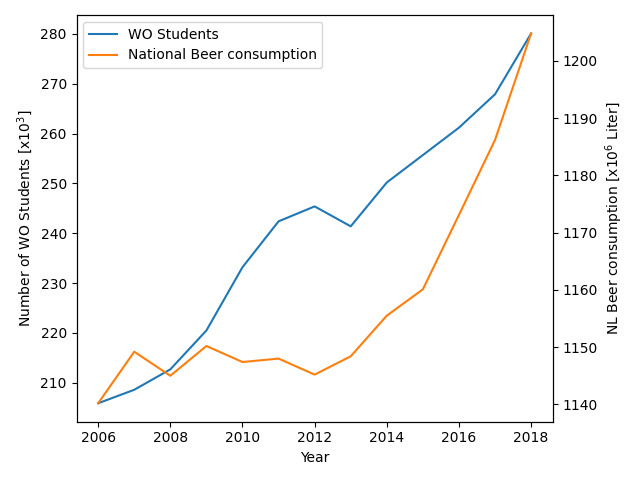

In [5]:
import matplotlib.pyplot as plt
import csv

%matplotlib widget

years           = []
wo              = []
beerConsumption = []

with open("../istherecorrelation.csv", encoding="UTF-8-sig") as csvFile:
    csvReader = csv.reader(csvFile, delimiter=';')
    
    # Take Header
    legend = next(csvReader)

    for row in csvReader:
        # Replace Comma's with Dots for float conversion of stats
        row = [stat.replace(',', '.') for stat in row]

        years.append(float(row[0]))
        wo.append(float(row[1]))
        beerConsumption.append(float(row[2]) * 10**5  / 10**6)
    
fig, ax1 = plt.subplots()
fig.set_tight_layout(True)

# A way to deal with matplotlib type hinting "Any" as secondary output instead of "Axes"
assert(isinstance(ax1, plt.Axes))

ax2 = ax1.twinx()

assert(isinstance(ax2, plt.Axes))

ax1.set_ylabel("Number of WO Students [x10$^{3}$]")
ax1.set_xlabel("Year")
ax2.set_ylabel("NL Beer consumption [x10$^{6}$ Liter]")

lines1 = ax1.plot(years, wo, label = "WO Students", color="tab:blue")
lines2 = ax2.plot(years, beerConsumption, label="National Beer consumption", color="tab:orange")

lines = lines1 + lines2
labels = [line.get_label() for line in lines]

ax1.legend(lines, labels)
fig.savefig("../media/plot.png", dpi=300)